In [2]:
!pip install jieba

In [3]:
!pip install collection

  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5116 sha256=7353d504098a0804b17de80f80e04f139a4fb73e8472204c2e1a3c4c98de5964
  Stored in directory: /root/.cache/pip/wheels/45/ed/3c/29a1c0600bb908a2e7421dc3a3775cbaed434a71b4ed93a439
Successfully built collection


In [4]:
import sys
sys.path.append('../')

import jieba
import jieba.analyse
from optparse import OptionParser

In [7]:
#切割字詞
cut_words=""
for line in open("hw1-dataset.txt"):
    line.strip('\n')
    seg_list=jieba.cut(line,cut_all=False)
    cut_words+=(" ".join(seg_list))
all_words=cut_words.split()


In [13]:
# 統計詞頻
from collections import Counter

c=dict()
e=0
for x in all_words:
    if len(x)>1 and x != '\r\n' and x not in c:
        c.setdefault(x,1)
for x in all_words:
    e+=1
    if len(x)>1 and x != '\r\n':
        c[x] += 1
c=sorted(c.items(), key=lambda x:x[1],reverse = True)
del c[100:]
for (k,v) in c:
    print("%s:%d"%(k,v))

八卦:79120
什麼:57761
台灣:35852
怎麼:33197
可以:23237
肥宅:21772
是不是:21561
真的:16891
知道:14115
自己:13561
不是:11944
現在:11280
就是:11022
不會:10752
如果:10691
還是:10590
一個:10536
中國:10231
一堆:10099
這樣:9672
有人:9667
怎樣:8862
時候:8807
女生:8631
日本:8595
一樣:8515
到底:8472
不要:8246
大家:7887
沒有:7746
...:7548
很多:7489
應該:7004
喜歡:6783
因為:6653
看到:6324
朋友:6304
問題:6178
感覺:6148
哪個:6127
如何:6008
這麼:5925
多少:5831
一直:5687
覺得:5528
這種:5415
美國:5359
不能:5268
不用:5231
根本:4953
一定:4864
正妹:4834
其實:4624
只有:4488
為何:4465
還有:4374
東西:4369
比較:4309
台北:4289
那麼:4265
可能:4250
以前:4140
QQ:3991
時間:3966
一下:3938
開始:3920
這個:3851
妹妹:3813
哪裡:3807
世界:3793
今天:3776
沒人:3726
甚麼:3701
出來:3657
所以:3634
那個:3578
直接:3564
發現:3560
中國人:3555
國家:3555
不到:3495
工作:3484
只是:3396
男生:3324
好吃:3321
他們:3221
公司:3200
老婆:3158
女友:3147
已經:2960
老師:2944
大學:2938
變成:2878
人家:2841
一起:2830
邊緣:2808
我們:2787
結果:2787
南部:2745
需要:2727


In [9]:
import math
import numpy as np
from matplotlib import pyplot as plt

def c_tf(list,n):
  tf=list/float(n)
  return tf
def c_idf(list,x):
  idf=math.log(float(x)/list)
  return idf

In [10]:
li=418202
for (k,v) in c:
      print(c_tf(v,e)*c_idf(v,li))

0.018377109626542362
0.015951453642504335
0.012286230734758638
0.01173268998916392
0.009368881607494899
0.008975997721238005
0.008918299809582555
0.007561830039171068
0.006672589128985839
0.0064864431071973245
0.0059245616737277065
0.005685203668787129
0.005590746208626277
0.005490992802842721
0.0054683257765898215
0.005430688242916541
0.005410510157503231
0.0052958106184569885
0.005245779071499931
0.005082269576142209
0.005080339589701204
0.004764771555451308
0.004742848768353565
0.0046723723670691235
0.004657895392337061
0.004625648898663809
0.0046082731458567
0.004516445246559821
0.004368790591821744
0.004310180197109797
0.004227270289433911
0.004202425539468982
0.00399568775087898
0.0038999483327717475
0.00384316384524946
0.00369785591299381
0.0036889468403795245
0.003632614988122867
0.0036191500752417293
0.0036097124913796676
0.0035560421687159415
0.0035184139785192073
0.003475602924832282
0.0034096088679493874
0.0033361489542487904
0.003283554811303544
0.003257368972961029
0.0032

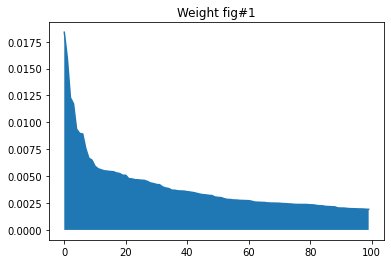

In [11]:
tf = [c_tf(c[i][1],e) for i in range(100)]
idf = [c_idf(c[i][1],li) for i in range(100)]
def print_TFIDF(tf,idf,n):
  ys = [(tf[i]*idf[i]) for i in range(n)]
  x = [x for x in range(len(ys))]

  plt.plot(x, ys, '-')
  plt.fill_between(x, ys)

  plt.title("Weight fig#1")
  plt.show()
print_TFIDF(tf,idf,100)

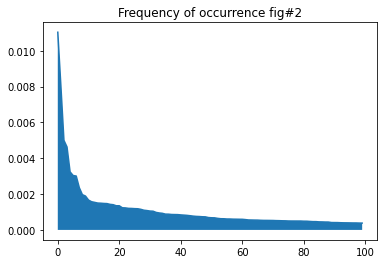

In [12]:
def print_TF(tf,n):
  ys = tf
  x = [x for x in range(len(ys))]

  plt.plot(x, ys, '-')
  plt.fill_between(x, ys)

  plt.title("Frequency of occurrence fig#2")
  plt.show()
print_TF(tf,100)